# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the data

In [2]:
df = pd.read_csv("data/raw/real_estate_price_size_year_view.csv")

In [3]:
df.head(5)

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [4]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## Create a dummy variable for 'view'

In [5]:
df["view"] = df["view"].map({"No sea view": 0, "Sea view": 1})

In [6]:
df.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## Create the regression

### Declare the dependent and the independent variables

In [7]:
y = df["price"]
X1 = df.iloc[:,1:]

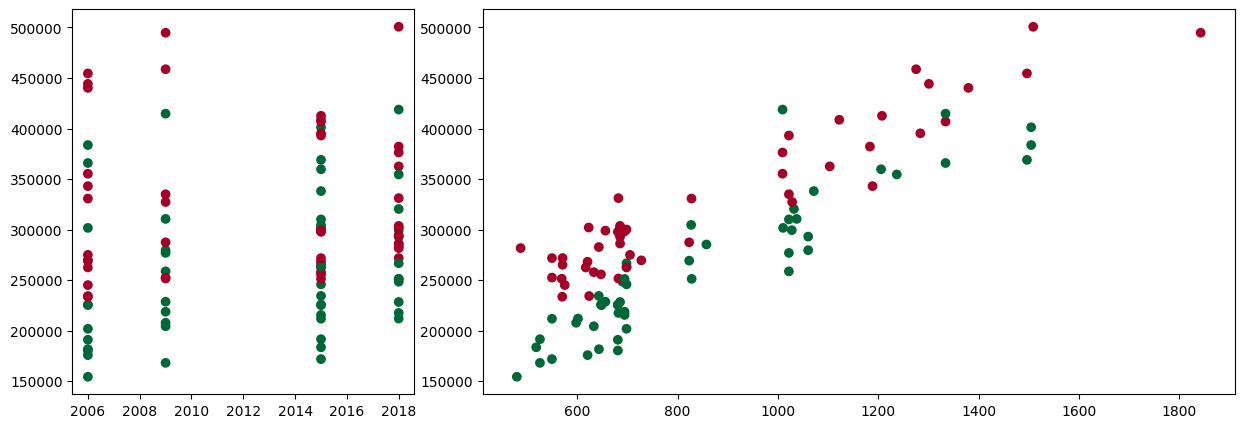

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X1["year"], y, c=X1["view"], cmap="RdYlGn_r")
plt.subplot(1, 3, (2, 4))
plt.scatter(X1["size"], y, c=X1["view"], cmap="RdYlGn_r")
plt.show()

### Regression

In [9]:
x = sm.add_constant(X1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           1.02e-50
Time:                        13:11:37   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.0

In [10]:
print(results.params)
print(results.predict(x))

const   -5.397914e+06
size     2.230316e+02
year     2.718949e+03
view     5.672602e+04
dtype: float64
0     224197.233189
1     210811.945021
2     254331.773344
3     416374.658398
4     405648.064843
          ...      
95    243802.939878
96    295836.058985
97    391904.118401
98    225356.997610
99    270325.279719
Length: 100, dtype: float64


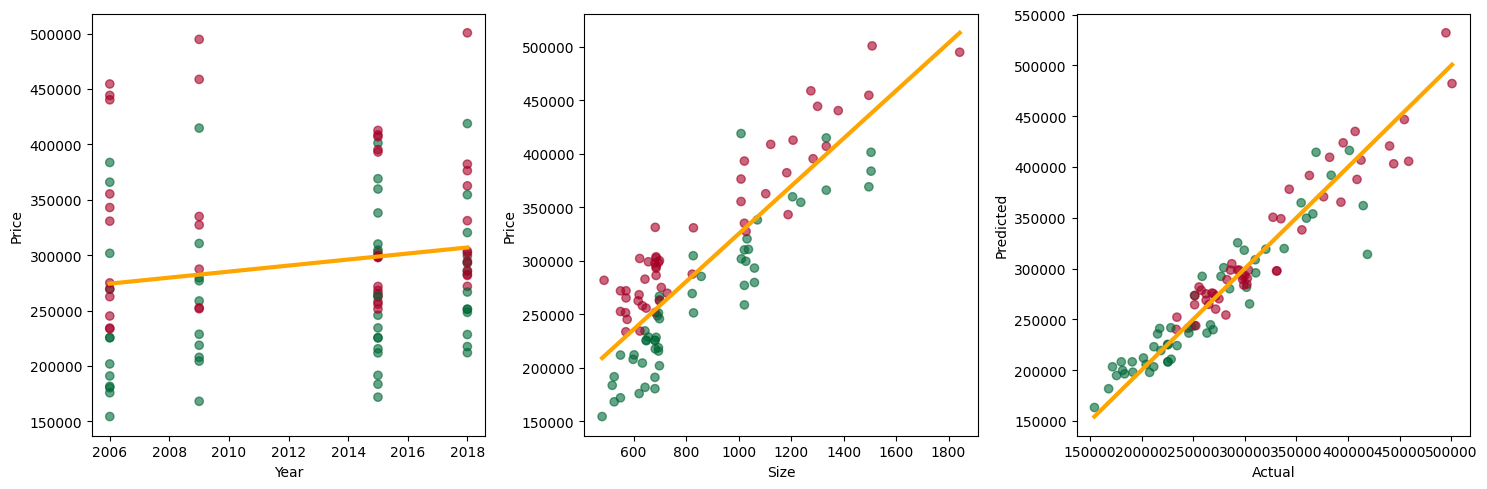

In [11]:
# prediction visual 
yhat = 223.0316*X1["size"] + 2718.9489*X1["year"] + 56730*X1["view"] - 5398000

plt.figure(figsize=(15, 5))

# ---------------- Year vs y ----------------
plt.subplot(1, 3, 1)
plt.scatter(X1["year"], y, c=X1["view"], cmap="RdYlGn_r", alpha=0.6)
# Regression line holding others at their mean
year_range = np.linspace(X1["year"].min(), X1["year"].max(), 100)
size_mean = X1["size"].mean()
view_mean = X1["view"].mean()
yhat_year = 223.0316*size_mean + 2718.9489*year_range + 56730*view_mean - 5398000
plt.plot(year_range, yhat_year, color="orange", lw=3)
plt.xlabel("Year")
plt.ylabel("Price")

# ---------------- Size vs y ----------------
plt.subplot(1, 3, 2)
plt.scatter(X1["size"], y, c=X1["view"], cmap="RdYlGn_r", alpha=0.6)
# Regression line holding others at their mean
size_range = np.linspace(X1["size"].min(), X1["size"].max(), 100)
year_mean = X1["year"].mean()
yhat_size = 223.0316*size_range + 2718.9489*year_mean + 56730*view_mean - 5398000
plt.plot(size_range, yhat_size, color="orange", lw=3)
plt.xlabel("Size")
plt.ylabel("Price")

# ---------------- Actual vs Predicted ----------------
plt.subplot(1, 3, 3)
plt.scatter(y, yhat, alpha=0.6, c=X1["view"], cmap="RdYlGn_r")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'orange', lw=3)  # perfect fit line
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()